In [1]:
! pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree


[Titanic](https://www.kaggle.com/c/titanic)

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Queremos responder a pergunta: "Que tipo de pessoas tiinha mais probabilidade de sobreviver ? "

Os dados do Titanic tem base de treino e base de teste. Os dados de treino tem detalhes de um subconjunto de passageiros a bordo (891 passageiros) e com a informação se sobreviveu ou não. Os dados de tests contem informações semalhantes mas não informam se o passageiro sobreviveu ou não, é justamente nosso rtabalho prever esse resultado. 

In [4]:
treino = pd.read_csv("data/train.csv")
teste = pd.read_csv("data/test.csv")

print("Conjunto de treino:", treino.shape)
print("Conjunto de teste:", teste.shape)

Conjunto de treino: (891, 12)
Conjunto de teste: (418, 11)


# Entendendo os dados

| Variável   | Definição                      | Chave                                         |
|------------|--------------------------------|-----------------------------------------------|
| survival   | Sobrevivência                  | 0 = Não, 1 = Sim                              |
| pclass     | Classe do ticket               | 1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe   |
| sex        | Sexo                           |                                               |
| Age        | Idade em anos                  |                                               |
| sibsp      | Nº de irmãos / cônjuges a bordo|                                               |
| parch      | Nº de pais / filhos a bordo    |                                               |
| ticket     | Número do ticket               |                                               |
| fare       | Tarifa paga pelo passageiro    |                                               |
| cabin      | Número da cabine               |                                               |
| embarked   | Porto de embarque              | C = Cherbourg, Q = Queenstown, S = Southampton|


In [6]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
treino['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
treino['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived'>

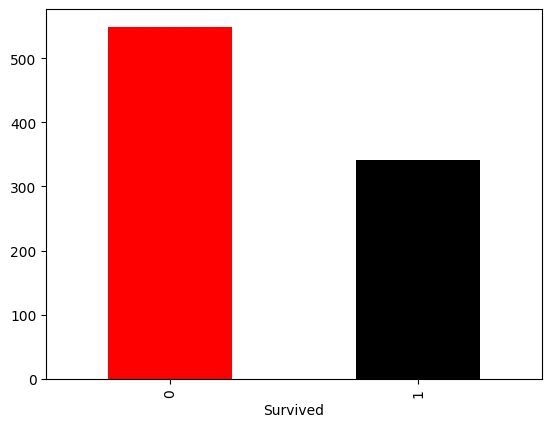

In [9]:
treino['Survived'].value_counts().plot(kind='bar', color=['red', 'black'])

In [10]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
pd.crosstab(treino['Survived'], treino['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


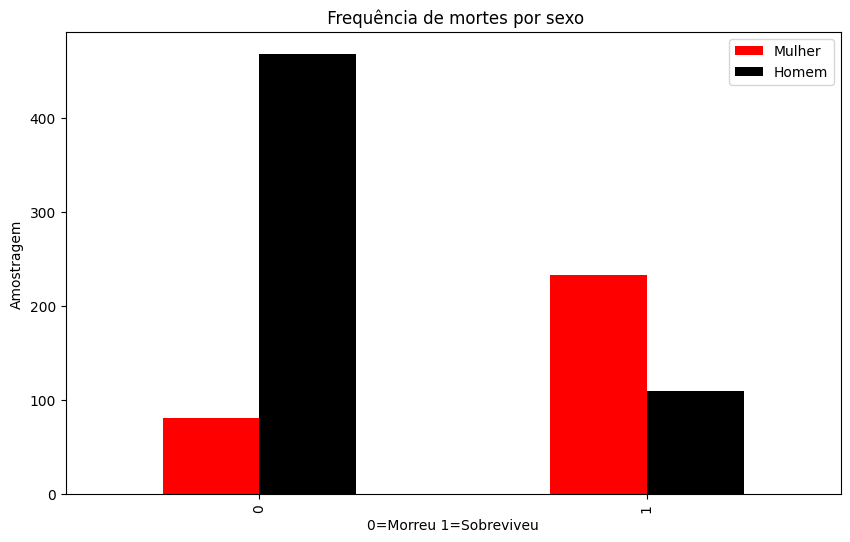

In [13]:
pd.crosstab(treino['Survived'], treino['Sex']).plot(kind='bar', figsize=(10,6), color=['red', 'black'])

plt.title(' Frequência de mortes por sexo')
plt.xlabel('0=Morreu 1=Sobreviveu')
plt.ylabel('Amostragem')
plt.legend(['Mulher', 'Homem'])

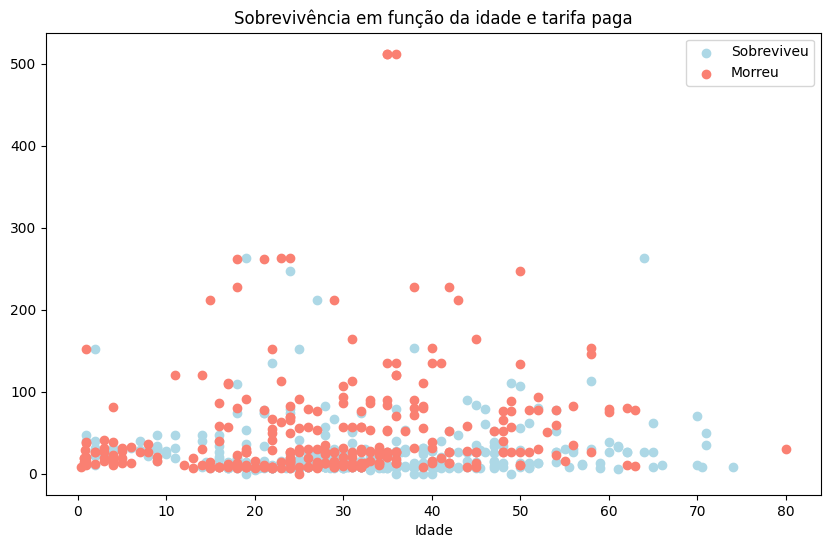

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(treino['Age'][treino['Survived']==0],  treino['Fare'][treino['Survived']==0], c='lightblue')
plt.scatter(treino['Age'][treino['Survived']==1],  treino['Fare'][treino['Survived']==1], c='salmon')

plt.title('Sobrevivência em função da idade e tarifa paga')
plt.xlabel('Idade')
plt.legend(['Sobreviveu', 'Morreu'])

In [15]:
pd.crosstab(treino['Pclass'], treino['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


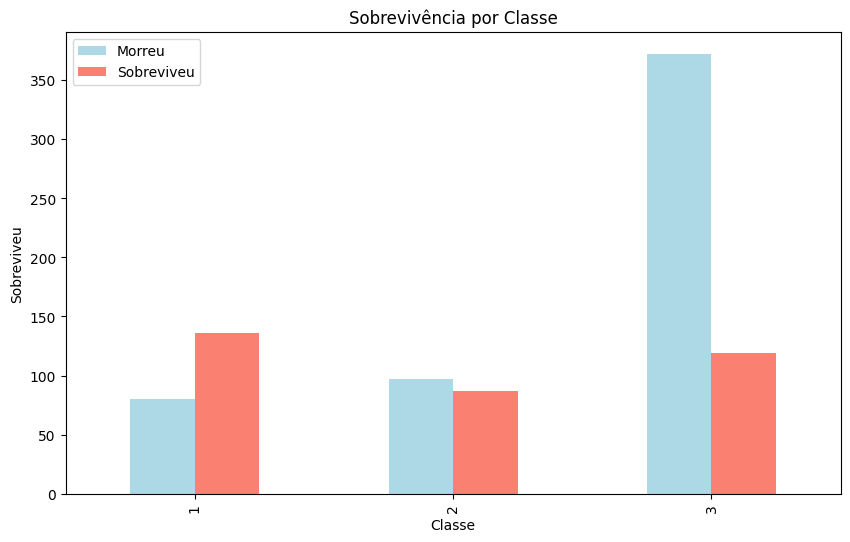

In [16]:
pd.crosstab(treino['Pclass'], treino['Survived']).plot(kind='bar', figsize=(10,6), color=['lightblue', 'salmon'])
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Sobreviveu')
plt.legend(['Morreu', 'Sobreviveu'])

<Axes: >

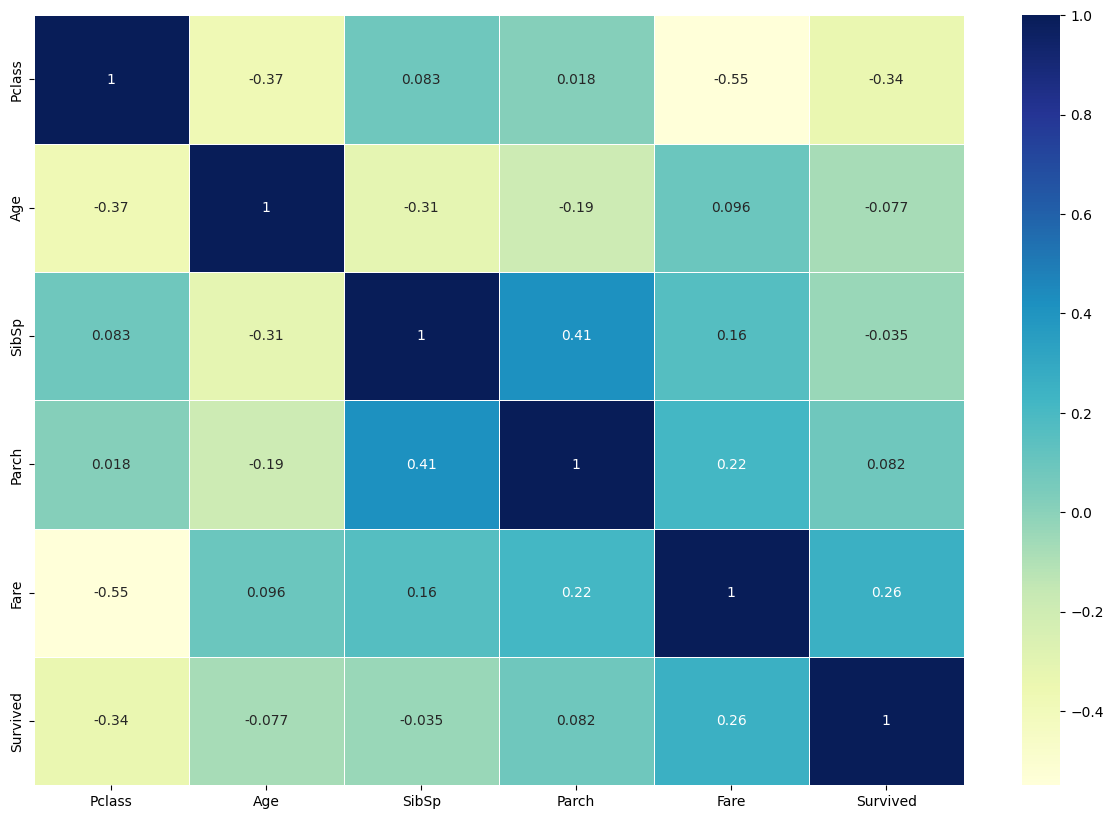

In [17]:
# Matriz de correlação

matriz_correlacao = treino[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(matriz_correlacao, annot=True, linewidths=0.5, cmap='YlGnBu')


In [18]:
X = pd.read_csv("data/train.csv")
y = pd.read_csv("data/test.csv")

In [19]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
genero_submissao = pd.read_csv("data/gender_submission.csv")
genero_submissao.head() 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [21]:
X = treino[['Pclass', 'Sex', 'Age']]
y = treino['Survived']
X

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [22]:
# Alterando os valores de Sexo
X = treino[['Pclass', 'Sex', 'Age']].copy()
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
886,2,0,27.0
887,1,1,19.0
888,3,1,NaN
889,1,0,26.0


In [23]:
# Colocando a mediana
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
X_treino, X_teste, y_treino, y_teste  = train_test_split(X,y, test_size=0.3, random_state=0)
#
modelo = DecisionTreeClassifier(criterion='gini')
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [25]:
resultados_corretos = y_teste
resultados_arvore = modelo.predict(X_teste)
precisao = accuracy_score(resultados_corretos, resultados_arvore)
precisao

0.7611940298507462

In [26]:
r = export_text(modelo, feature_names=X.columns.values.tolist())
print(r)

|--- Sex <= 0.50
|   |--- Age <= 14.00
|   |   |--- Pclass <= 2.50
|   |   |   |--- class: 1
|   |   |--- Pclass >  2.50
|   |   |   |--- Age <= 11.50
|   |   |   |   |--- Age <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  2.50
|   |   |   |   |   |--- Age <= 3.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  3.50
|   |   |   |   |   |   |--- Age <= 10.00
|   |   |   |   |   |   |   |--- Age <= 5.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Age >  5.00
|   |   |   |   |   |   |   |   |--- Age <= 7.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  7.00
|   |   |   |   |   |   |   |   |   |--- Age <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  8.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  10.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |

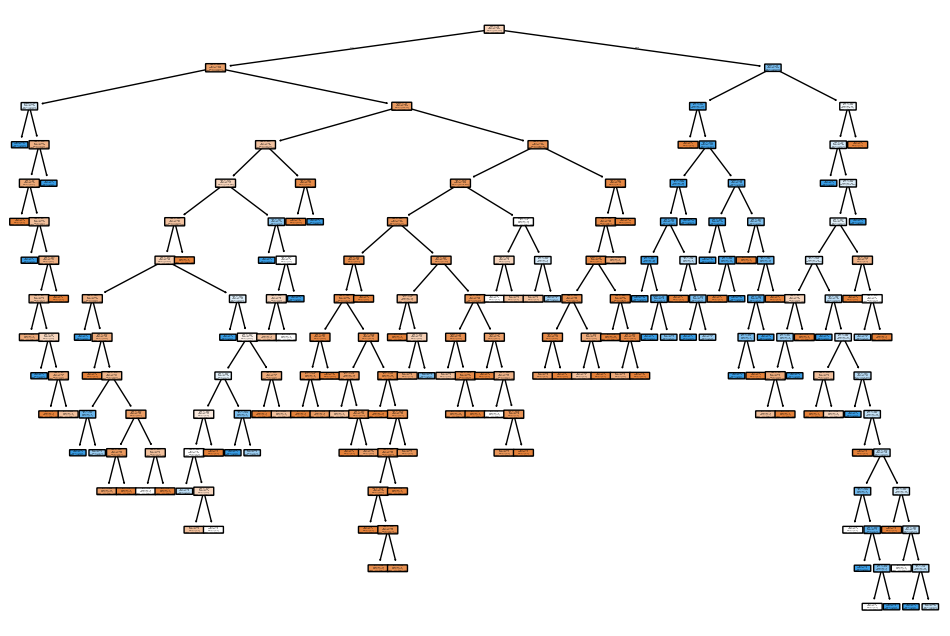

In [27]:
plt.figure(figsize=(12, 8))
plot_tree(modelo, feature_names=X.columns, class_names=['Não sobreviveu', 'Sobreviveu'], filled=True, rounded=True)
plt.show()



In [28]:
# Ajuste de hiperparametros e validação cruzada

treino_score = []
teste_score = []

#Parametros : max_depth, min_samples_split, min_samples_leaf, max_features, max_leaf_nodes
profundidade_maxima = range(1, 20)

modelo = DecisionTreeClassifier(criterion='gini')

for i in profundidade_maxima:
    modelo.set_params(max_depth=i)
    modelo.fit(X_treino, y_treino)
    treino_score.append(modelo.score(X_treino, y_treino))
    teste_score.append(modelo.score(X_teste, y_teste))

In [29]:
treino_score

[0.7865168539325843,
 0.7913322632423756,
 0.8170144462279294,
 0.8186195826645265,
 0.826645264847512,
 0.8362760834670947,
 0.8523274478330658,
 0.8619582664526485,
 0.8764044943820225,
 0.8828250401284109,
 0.884430176565008,
 0.8860353130016051,
 0.8892455858747994,
 0.8892455858747994,
 0.8892455858747994,
 0.8892455858747994,
 0.8892455858747994,
 0.8892455858747994,
 0.8892455858747994]

In [30]:
teste_score

[0.7873134328358209,
 0.7873134328358209,
 0.7985074626865671,
 0.7910447761194029,
 0.7873134328358209,
 0.7798507462686567,
 0.7574626865671642,
 0.7649253731343284,
 0.7425373134328358,
 0.75,
 0.753731343283582,
 0.7574626865671642,
 0.7649253731343284,
 0.7611940298507462,
 0.7611940298507462,
 0.7611940298507462,
 0.7611940298507462,
 0.7611940298507462,
 0.7611940298507462]

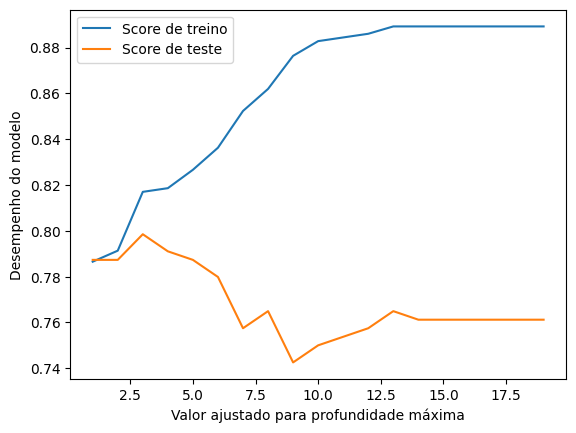

In [31]:
plt.plot(profundidade_maxima, treino_score, label='Score de treino')
plt.plot(profundidade_maxima, teste_score, label='Score de teste')
plt.xlabel('Valor ajustado para profundidade máxima')
plt.ylabel('Desempenho do modelo')
plt.legend()

In [32]:
print(f'Desempenho máximo do modelo de Árvore de decisão nos dados  de teste: {max(teste_score)*100:.2f}')

Desempenho máximo do modelo de Árvore de decisão nos dados  de teste: 79.85


In [33]:
# RandomizedSearchCV
#Parametros : max_depth, min_samples_split, min_samples_leaf, max_features, max_leaf_nodes
from sklearn.model_selection import RandomizedSearchCV

In [34]:
grid_parametros = {
    'min_samples_split': range(2, 20),
    'max_depth': range(1, 20),
    'min_samples_leaf': range(1, 20),
    'max_features': range(1, 20),
    'max_leaf_nodes': range(1, 20),
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [ ]:
modelo_randomizedSCV = RandomizedSearchCV (DecisionTreeClassifier(criterion='gini'), param_distributions=grid_parametros, cv=5, n_iter=100, verbose=True )
modelo_randomizedSCV.fit(X_treino, y_treino)

In [36]:
modelo_randomizedSCV.best_params_

{'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 13,
 'max_features': 19,
 'max_depth': 16,
 'criterion': 'entropy'}

In [37]:
modelo_randomizedSCV.score(X_treino, y_treino)

0.8250401284109149

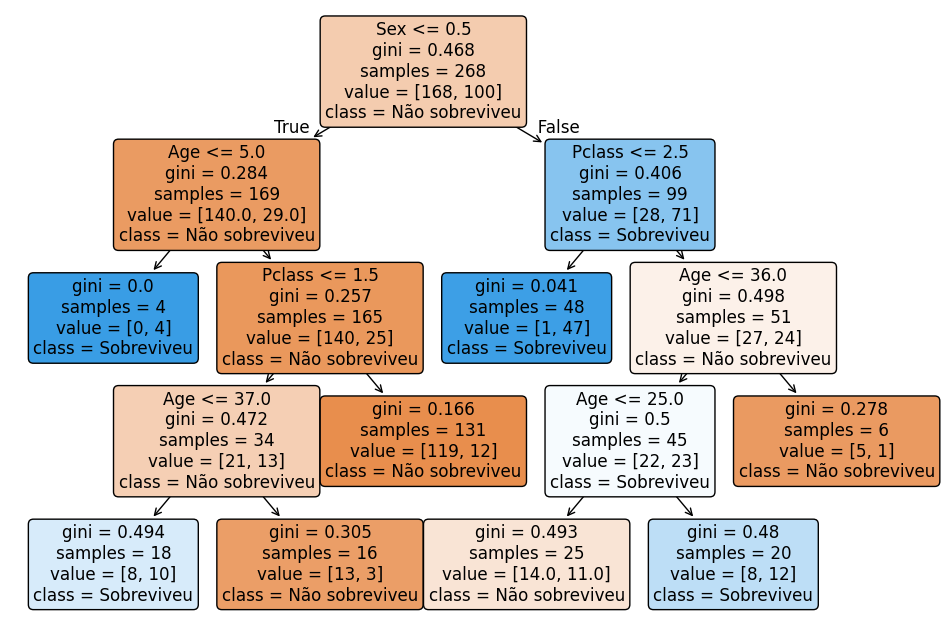

In [38]:
modelo_hiperparametros = DecisionTreeClassifier(criterion='gini', 
                                                min_samples_split=11, min_samples_leaf=4, max_leaf_nodes=8, max_features=14, max_depth=4)
modelo_hiperparametros.fit(X_teste, y_teste)

plt.figure(figsize=(12, 8))
plot_tree(modelo_hiperparametros , feature_names=X.columns, class_names=['Não sobreviveu', 'Sobreviveu'], filled=True, rounded=True)
plt.show()


In [39]:
modelo_hiperparametros.score(X_teste, y_teste)

0.835820895522388

In [ ]:
from sklearn.model_selection import GridSearchCV
gridscv = GridSearchCV(DecisionTreeClassifier(), param_grid=grid_parametros, cv=5, verbose=True)
gridscv.fit(X_treino, y_treino)

In [40]:
from sklearn.metrics import roc_curve, auc


In [41]:
modelo_hiperparametros

DecisionTreeClassifier(max_depth=4, max_features=14, max_leaf_nodes=8,
                       min_samples_leaf=4, min_samples_split=11)

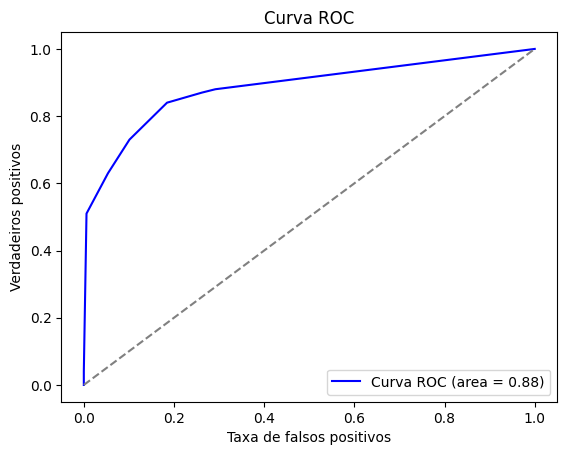

In [42]:
y_proba = modelo_hiperparametros.predict_proba(X_teste)[:, 1]

fpr, tpr, thresholds = roc_curve(y_teste, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Verdadeiros positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [43]:
y_preds = modelo_hiperparametros.predict(X_teste)
y_preds

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [44]:
np.array(y_teste)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste, y_preds))

[[151  17]
 [ 27  73]]


Text(8.222222222222223, 0.5, 'rotulos previstos')

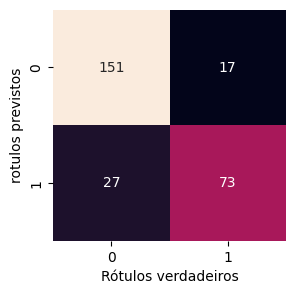

In [46]:
#sns.set_theme(font_scale=1.1)

fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrix(y_teste, y_preds), annot=True,fmt='g', cbar=False)

plt.xlabel('Rótulos verdadeiros')
plt.ylabel('rotulos previstos')


In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_teste, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       168
           1       0.81      0.73      0.77       100

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.84      0.83       268



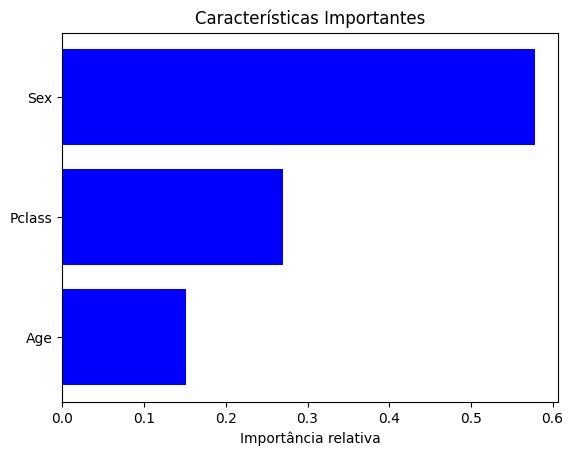

In [49]:
importantes = modelo_hiperparametros.feature_importances_
indices = np.argsort(importantes)
caracteristicas = ['Pclass', 'Sex', 'Age']
plt.title('Características Importantes')
plt.barh(range(len(indices)), importantes[indices], color='b', align='center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importância relativa')
plt.show()